# IHLT Project


In [4]:
# Autoreload
%load_ext autoreload
%autoreload 2

import pandas as pd
import csv
import nltk

from utils.preprocessor import Preprocessor
from features.dummy_features import add_dummy_features
from features.statistical_features import add_POS_statistics

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data

In [5]:
TRAIN_PATH = '../data/train/01_raw/'
TRAIN_GS_PATH = '../data/train/scores/'
TEST_PATH = '../data/test/01_raw/'
TEST_GS_PATH = '../data/test/scores/'

def load_data(path_f, path_gs, files):
    # Read first file
    dt = pd.read_csv(path_f + 'STS.input.' + files[0] + '.txt', sep='\t', quoting=csv.QUOTE_NONE, header=None, names=['s1', 's2'])
    dt['gs'] = pd.read_csv(path_gs + 'STS.gs.' + files[0] + '.txt', sep='\t', header=None, names=['gs'])
    # Concatenate the rest of files
    for f in files[1:]:
        dt2 = pd.read_csv(path_f + 'STS.input.' + f + '.txt', sep='\t', quoting=csv.QUOTE_NONE, header=None, names=['s1', 's2'])
        dt2['gs'] = pd.read_csv(path_gs + 'STS.gs.' + f + '.txt', sep='\t', header=None, names=['gs'])
        dt = pd.concat([dt, dt2], ignore_index=True)
    return dt

## Create models

In [6]:
def train_NN(df, input, output):
    X = df[input]
    y = df[output]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    model = Sequential()
    model.add(Dense(10, input_dim=len(input), activation='relu'))
    model.add(Dense(5, activation='relu'))               
    model.add(Dense(1))                                   
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)
    return history, model


In [7]:
def plot_history(history):
    import matplotlib.pyplot as plt
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Basic pipeline

### Train a model

Index(['s1', 's2', 'gs', 'dif_n_words', 'dif_n_verbs', 'dif_n_nouns',
       'dif_n_adjectives', 'dif_n_adverbs'],
      dtype='object')


c:\Users\Kacpe\Desktop\College Work\Repos\Intro to HLT\Work\Labs\project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.8470 - mae: 3.1255 - val_loss: 11.4890 - val_mae: 3.1250
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4879 - mae: 2.7612 - val_loss: 8.4456 - val_mae: 2.6173
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8658 - mae: 2.2886 - val_loss: 5.7925 - val_mae: 2.0985
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2027 - mae: 1.9113 - val_loss: 4.2515 - val_mae: 1.7900
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2375 - mae: 1.7166 - val_loss: 3.2743 - val_mae: 1.5504
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4369 - mae: 1.5215 - val_loss: 2.7161 - val_mae: 1.3980
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0521 - mae: 1.4145 - val_loss: 2.3836 - val_mae: 1.3027
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0747 - mae: 1.3822 - val_loss: 2.1641 - val_mae: 1.2396
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5190 - mae

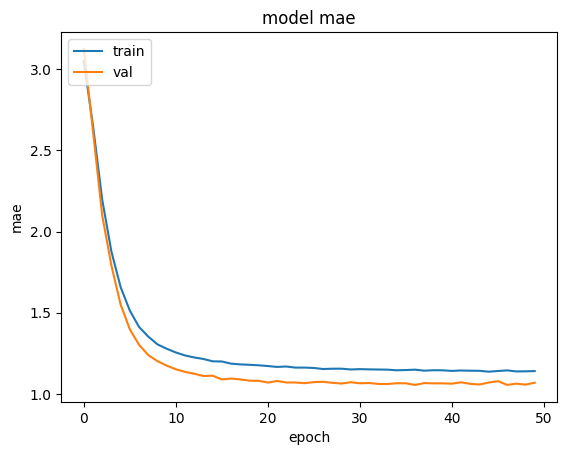

In [ ]:
# Create the desired features
def add_features(dt):
    #add_dummy_features(dt)
    add_POS_statistics(dt)

# Load train data
all_train_files = ['SMTeuroparl', 'MSRvid', 'MSRpar']
df = load_data(TRAIN_PATH, TRAIN_GS_PATH, all_train_files)

# Add features to the train data
add_features(df)

# Print all columns of df
print(df.columns)

# Features to use in the model
features = ['dif_n_words', 'dif_n_verbs', 'dif_n_nouns', 'dif_n_adjectives', 'dif_n_adverbs']
# # Train the model
hist, model = train_NN(df, features, 'gs')
plot_history(hist)


## Compute correlation of the model

In [13]:
from scipy.stats import pearsonr

# Load test data
# Doubt: The files with the same name are the same files as in the training set? If so, we have to use them also for testing?
all_test_files = ['SMTeuroparl', 'MSRvid', 'MSRpar', 'surprise.OnWN', 'surprise.SMTnews']
df_test = load_data(TEST_PATH, TEST_GS_PATH, all_test_files)

# Add the features to the test data
add_features(df_test)
# Fill column of the dataset with the predictions of the model
df_test['predicted'] = model.predict(df_test[features])

# Compute the Pearson correlation between the predictions and the gold standard
corr = pearsonr(df_test['gs'], df_test['predicted'])[0]
print('Pearson correlation:', corr)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Pearson correlation: 0.015841534833347354
